In [3]:
# !git add .
# !git commit -m "Init"
# !git push

[master 3817fc6] Init
 Committer: Daniel Alexander <danielalexander@Daniels-Mac-mini.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 46 insertions(+)
 create mode 100644 notebooks/Untitled.ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 856 bytes | 856.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:daniel-alexandr/Assignment2_ML_as_a_service.git
   7

In [1]:
# Loading the dependency 
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

import os

# Determine the current working directory
current_directory = os.getcwd()

# Go up two directory levels
root_directory = os.path.abspath(os.path.join(current_directory, "..", ".."))

# Set the current working directory to the root directory
os.chdir(root_directory)

# Verify that the current working directory has been updated
os.getcwd()

'/Users/danielalexander/Desktop/Advanced_ML_Algo/adv_ml_algo_assignment_2'

In [2]:
# !pip install -i https://test.pypi.org/simple/ my-krml-24591214

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/b8/43/8a043a4f6e434c376cb600bfb75b633231a5381e556ba4848c8e99d9aaf2/my_krml_24591214-0.1.1-py3-none-any.whl (5.6 kB)


In [5]:
# ! pip install -i https://test.pypi.org/simple/ my-krml-149874

Looking in indexes: https://test.pypi.org/simple/
INFO: pip is looking at multiple versions of my-krml-149874 to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of my-krml-149874 to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install my-krml-149874==0.1.0, my-krml-149874==0.1.1, my-krml-149874==0.1.10, my-krml-149874==0.1.2, my-krml-149874==0.1.3, my-krml-149874==0.1.6, my-krml-149874==0.1.7, my-krml-149874==0.1.8 and my-krml-149874==0.1.9 because these package versions have conflicting dependencies.

The conflict is caused by:
    my-krml-149874 0.1.10 depends on pandas==2.0.1
    my-krml-149874 0.1.9 depends on pandas==2.0.1
    my-krml-149874 0.1.8 depends on pandas==2.0.1
    my-krml-149874 0.1.7 depends on pandas==2.0.1
    my-krml-149874 0.1.6 depends on pandas==2.0.1
    my-krml-149874 0.1.3 depends on pandas==2.0.1
    my-krml-149874 0.1.2 

In [8]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [3]:
items_weekly_sell_price_df = pd.read_csv('data/raw/items_weekly_sell_prices.csv')
calendar_events_df= pd.read_csv('data/raw/calendar_events.csv')
calendar_df= pd.read_csv('data/raw/calendar.csv')
sales_train_df= pd.read_csv('data/raw/sales_train.csv')
sales_test_df= pd.read_csv('data/raw/sales_test.csv')
merged_df_v3= pd.read_csv('data/interim/merged_df_v3.csv')



/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_3891/4028357538.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df_v3= pd.read_csv('data/interim/merged_df_v3.csv')


In [59]:
merged_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815174 entries, 0 to 34815173
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item_id     object 
 2   dept_id     object 
 3   cat_id      object 
 4   store_id    object 
 5   state_id    object 
 6   day         object 
 7   sales       int64  
 8   date        object 
 9   wm_yr_wk    int64  
 10  d           object 
 11  week        int64  
 12  sell_price  float64
 13  event_name  object 
 14  event_type  object 
 15  revenue     float64
dtypes: float64(2), int64(3), object(11)
memory usage: 4.2+ GB


In [4]:
from datetime import datetime

#  Converting string date to datetime format

merged_df_v3['date'] = pd.to_datetime(merged_df_v3['date'])

In [5]:
# 

grouped = merged_df_v3.groupby(['date'])  # Group the DataFrame by the 'Date' column
grouped_df = grouped['revenue'].sum().reset_index()  # Calculate the sum of 'revenue' for each group




In [7]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1540 non-null   datetime64[ns]
 1   revenue  1540 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


In [8]:
grouped_df.set_index('date', inplace=True)
grouped_df.head()


,revenue
date,
2011-01-29,81650.61
2011-01-30,78970.57
2011-01-31,57706.91
2011-02-01,60761.20
2011-02-02,46959.95


/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsm

2017-01-01    107822.866836
Freq: D, dtype: float64


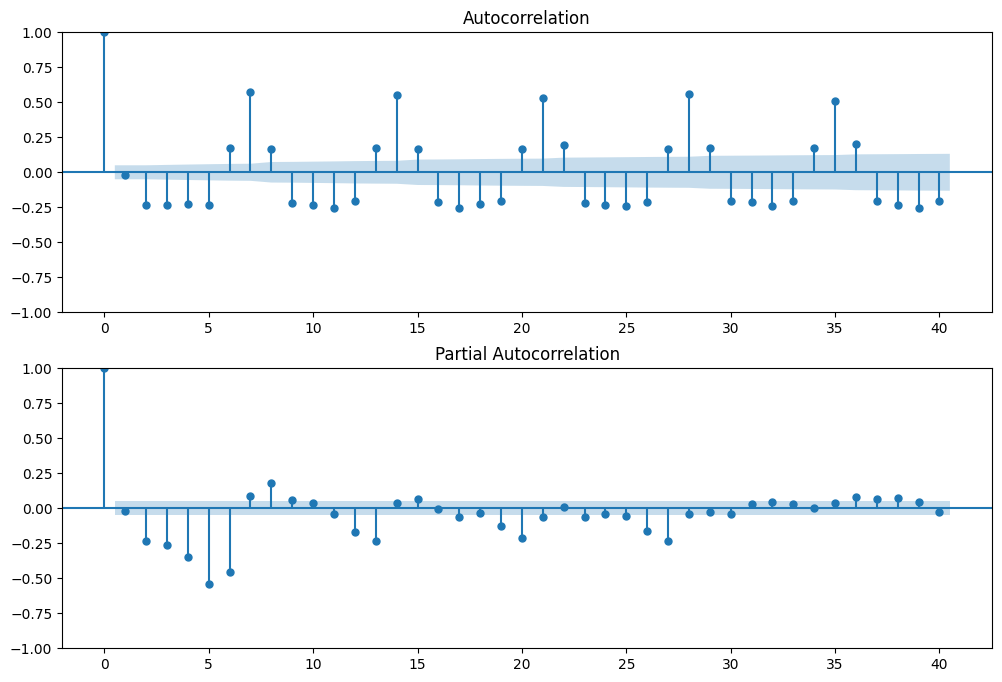

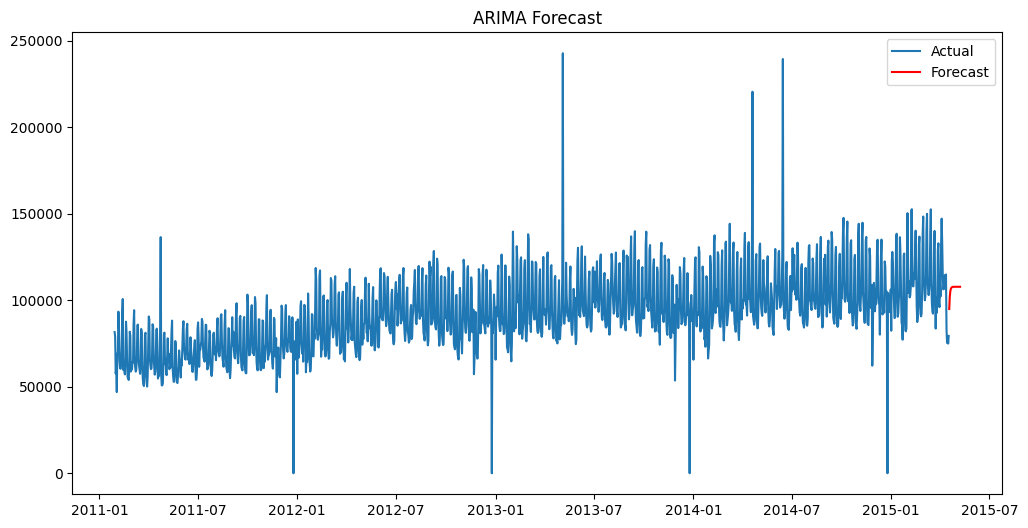

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your DataFrame and preprocess the data as mentioned above

# Perform differencing if needed to make the data stationary
d = 1
grouped_df['rev_diff'] = grouped_df['revenue'].diff(d)

# ACF and PACF plots to determine p and q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(grouped_df['rev_diff'].dropna(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(grouped_df['rev_diff'].dropna(), lags=40, ax=ax2)

# Fit ARIMA model
p, q = 1, 1  # Example values for p and q
model = sm.tsa.ARIMA(grouped_df['revenue'], order=(p, d, q))
results = model.fit()

# Make predictions
forecast_periods = 21  # Number of periods to forecast
start_forecast_date='2017-01-01'
forecast = results.forecast(steps=forecast_periods)
predict=results.predict(start_forecast_date)

print(predict)
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df['revenue'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [23]:
from joblib import dump

dump(results,'models/forecasting/ARIMA_model.joblib')

['models/forecasting/ARIMA_model.joblib']

In [13]:
predict

2017-01-01    107822.866836
Freq: D, dtype: float64